# 주제: 금리, 물가가 종합적으로 주식 시장과 가상자산 시장에 미치는 영향


In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
from datetime import datetime, timedelta

startdate='2015-01-02'
enddate='2024-01-01'
# 비트코인
btc=yf.download('BTC-USD', startdate, enddate, auto_adjust=True)
# 금리
ir=yf.download('^TNX', startdate, enddate, auto_adjust=True)
# 투자 심리
vix=yf.download('^VIX', startdate, enddate, auto_adjust=True)
# 물가
cpi = pd.read_csv('./datasets/CPILFESL.csv')
# 나스닥 지수
nas=yf.download('^IXIC', startdate, enddate, auto_adjust=True)
# 비트코인 도미넌스
dominance = pd.read_csv('./datasets/bitcoin-dominance_(Coinmarketcap).csv')
# 전세계 코로나 확진자
covid = pd.read_csv('./datasets/worldometer_data.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### 데이터 전처리

#### 모든 데이터들이 기간이 다르기 때문에 통일시켯다.

In [4]:
cpi_df = cpi[(cpi['DATE'] >= '2015-01-01') & (cpi['DATE'] <= '2023-12-31')]
cpi_df

,DATE,CPILFESL
696,2015-01-01,239.811
697,2015-02-01,240.172
698,2015-03-01,240.755
699,2015-04-01,241.346
700,2015-05-01,241.688
...,...,...
799,2023-08-01,309.656
800,2023-09-01,310.644
801,2023-10-01,311.390
802,2023-11-01,312.349


In [5]:
dominance['DateTime'] = pd.to_datetime(dominance['DateTime'])
dominance['DateTime'] = dominance['DateTime'].dt.strftime('%Y-%m-%d')
dominance_df = dominance[(dominance['DateTime'] >= '2015-01-01') & (dominance['DateTime'] <= '2023-12-31')]
dominance_df


,DateTime,BTC,ETH,USDT,BNB,SOL,기타
87,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
88,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
89,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
90,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
91,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
552,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
553,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
554,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
555,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


#### 필요없는 칼럼을 정리하고 index였던 Date를 칼럼으로 변경하고 새롭게 index를 추가했다. 

In [6]:
cpi_df.columns  =['Date', 'Cpi']
cpi_df = cpi_df.reset_index(drop='true')
cpi_df

,Date,Cpi
0,2015-01-01,239.811
1,2015-02-01,240.172
2,2015-03-01,240.755
3,2015-04-01,241.346
4,2015-05-01,241.688
...,...,...
103,2023-08-01,309.656
104,2023-09-01,310.644
105,2023-10-01,311.390
106,2023-11-01,312.349


In [7]:
dominance_df.columns  =['Date','BTC','ETH','USDT','BNB','SOL','etc']
dominance_df = dominance_df.reset_index(drop='true')
dominance_df

,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


In [8]:
covid_df = covid.drop(columns=['NewDeaths', 'Deaths/1M pop', 'NewCases' ,'Country/Region', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region'], axis=1)
covid_df

,Continent,Population,TotalCases,TotalDeaths
0,North America,3.311981e+08,5032179,162804.0
1,South America,2.127107e+08,2917562,98644.0
2,Asia,1.381345e+09,2025409,41638.0
3,Europe,1.459409e+08,871894,14606.0
4,Africa,5.938157e+07,538184,9604.0
...,...,...,...,...
204,North America,4.992000e+03,13,1.0
205,North America,2.624700e+04,13,NaN
206,South America,3.489000e+03,13,NaN
207,Europe,8.010000e+02,12,NaN


In [9]:
nasdaq_df = nas.reset_index()
display(nasdaq_df)
btc_df = btc.reset_index()
display(btc_df)
ir_df = ir.reset_index()
display(ir_df)
vix_df = vix.reset_index()
display(vix_df)
display(cpi_df)
display(dominance_df)

,Date,Open,High,Low,Close,Volume
0,2015-01-02,4760.240234,4777.009766,4698.109863,4726.810059,1435150000
1,2015-01-05,4700.339844,4702.770020,4641.459961,4652.569824,1794470000
2,2015-01-06,4666.850098,4667.330078,4567.589844,4592.740234,2167320000
3,2015-01-07,4626.839844,4652.720215,4613.899902,4650.470215,1957950000
4,2015-01-08,4689.540039,4741.379883,4688.020020,4736.189941,2105450000
...,...,...,...,...,...,...
2259,2023-12-22,15006.179688,15047.190430,14927.120117,14992.969727,4796600000
2260,2023-12-26,15028.690430,15101.179688,15024.059570,15074.570312,6120600000
2261,2023-12-27,15089.660156,15114.080078,15051.669922,15099.179688,7480170000
2262,2023-12-28,15142.089844,15150.070312,15087.219727,15095.139648,5090570000


,Date,Open,High,Low,Close,Volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,23245700
...,...,...,...,...,...,...
3281,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,25260941032
3282,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,22992093014
3283,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,26000021055
3284,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,16013925945


,Date,Open,High,Low,Close,Volume
0,2015-01-02,2.197,2.213,2.102,2.123,0
1,2015-01-05,2.102,2.109,2.037,2.039,0
2,2015-01-06,1.968,1.997,1.889,1.963,0
3,2015-01-07,1.975,2.008,1.938,1.954,0
4,2015-01-08,2.004,2.030,1.988,2.016,0
...,...,...,...,...,...,...
2258,2023-12-22,3.852,3.919,3.849,3.901,0
2259,2023-12-26,3.908,3.908,3.882,3.886,0
2260,2023-12-27,3.852,3.852,3.785,3.789,0
2261,2023-12-28,3.818,3.861,3.800,3.850,0


,Date,Open,High,Low,Close,Volume
0,2015-01-02,17.760000,20.139999,17.049999,17.790001,0
1,2015-01-05,19.190001,21.290001,19.190001,19.920000,0
2,2015-01-06,20.330000,22.900000,19.520000,21.120001,0
3,2015-01-07,20.150000,20.719999,19.040001,19.309999,0
4,2015-01-08,17.930000,18.090000,16.990000,17.010000,0
...,...,...,...,...,...,...
2259,2023-12-22,13.720000,13.960000,13.000000,13.030000,0
2260,2023-12-26,13.770000,13.800000,12.960000,12.990000,0
2261,2023-12-27,13.020000,13.040000,12.370000,12.430000,0
2262,2023-12-28,12.440000,12.650000,12.380000,12.470000,0


,Date,Cpi
0,2015-01-01,239.811
1,2015-02-01,240.172
2,2015-03-01,240.755
3,2015-04-01,241.346
4,2015-05-01,241.688
...,...,...
103,2023-08-01,309.656
104,2023-09-01,310.644
105,2023-10-01,311.390
106,2023-11-01,312.349


,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


#### 결측치를 확인하였다.

In [10]:
print(nasdaq_df.isna().sum())
print(btc_df.isna().sum())
print(ir_df.isna().sum())
print(vix_df.isna().sum())
print(cpi_df.isna().sum())
print(dominance_df.isna().sum())
print(covid_df.isna().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Date    0
Cpi     0
dtype: int64
Date    0
BTC     0
ETH     0
USDT    0
BNB     0
SOL     0
etc     0
dtype: int64
Continent       1
Population      1
TotalCases      0
TotalDeaths    21
dtype: int64


#### 결측치를 확인한 결과 covid_df에만 결측치가 있었고 제일 큰 단위인 Continent의 결측치를 제거한 뒤 다시 확인해 보았다.

In [11]:
covid_df = covid_df[~covid_df['Continent'].isna()]
covid_df.isna().sum()

Continent       0
Population      0
TotalCases      0
TotalDeaths    21
dtype: int64

#### 그럼에도 TotalDeaths 칼럼에 결측치가 남아있어 0으로 대체하였다.

In [12]:
covid_df.fillna(0, inplace=True)
covid_df.isna().sum()

C:\Users\qortl\AppData\Local\Temp\ipykernel_29820\3283445809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df.fillna(0, inplace=True)


Continent      0
Population     0
TotalCases     0
TotalDeaths    0
dtype: int64

#### 중복행은 존재하지 않았다.

In [13]:
print(nasdaq_df.duplicated().sum())
print(btc_df.duplicated().sum())
print(ir_df.duplicated().sum())
print(vix_df.duplicated().sum())
print(cpi_df.duplicated().sum())
print(dominance_df.duplicated().sum())
print(covid_df.duplicated().sum())

0
0
0
0
0
0
0


### 시각화를 위해 여러 데이터셋을 정규화 하였다.

In [14]:
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
dominance_df['Date'] = pd.to_datetime(dominance_df['Date'])

In [15]:
from sklearn.preprocessing import MinMaxScaler

btc_scale = MinMaxScaler()
btc_df[['Open', 'High', 'Low', 'Close', 'Volume']] = btc_scale.fit_transform(btc_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(btc_df)

cpi_scale = MinMaxScaler()
cpi_df[['Cpi']] = cpi_scale.fit_transform(cpi_df[['Cpi']])
display(cpi_df)

ir_scale = MinMaxScaler()
ir_df[['Open', 'High', 'Low', 'Close', 'Volume']] = ir_scale.fit_transform(ir_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(ir_df)

nas_scale = MinMaxScaler()
nasdaq_df[['Open', 'High', 'Low', 'Close', 'Volume']] = nas_scale.fit_transform(nasdaq_df[['Open', 'High', 'Low', 'Close', 'Volume']])
display(nasdaq_df)

vix_scale = MinMaxScaler()
vix_df[['Open', 'High', 'Low', 'Close', 'Volume']] = vix_scale.fit_transform(vix_df[['Open', 'High', 'Low', 'Close', 'Volume']])
vix_df['Close'] = 1 - vix_df['Close']
display(vix_df)

#별도로 사용할 데이터셋은 정규화를 따로 하지 않음
dominance_df.iloc[:, 1:] = dominance_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
display(dominance_df)

,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.002036,0.001518,0.002146,0.002032,0.000000
1,2015-01-03,0.002048,0.001508,0.001655,0.001528,0.000072
2,2015-01-04,0.001547,0.001101,0.001300,0.001278,0.000136
3,2015-01-05,0.001309,0.000971,0.001413,0.001430,0.000103
4,2015-01-06,0.001450,0.001106,0.001528,0.001604,0.000044
...,...,...,...,...,...,...
3281,2023-12-27,0.628467,0.633899,0.634281,0.642018,0.071954
3282,2023-12-28,0.642563,0.635672,0.636561,0.629924,0.065490
3283,2023-12-29,0.629894,0.625750,0.623051,0.622082,0.074060
3284,2023-12-30,0.622133,0.617872,0.625047,0.622935,0.045607


,Date,Cpi
0,2015-01-01,0.000000
1,2015-02-01,0.004918
2,2015-03-01,0.012861
3,2015-04-01,0.020913
4,2015-05-01,0.025573
...,...,...
103,2023-08-01,0.951593
104,2023-09-01,0.965054
105,2023-10-01,0.975217
106,2023-11-01,0.988283


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.379570,0.375645,0.379004,0.361773,0.0
1,2015-01-05,0.358520,0.352321,0.364546,0.343061,0.0
2,2015-01-06,0.328828,0.327203,0.331628,0.326131,0.0
3,2015-01-07,0.330379,0.329670,0.342527,0.324126,0.0
4,2015-01-08,0.336805,0.334604,0.353648,0.337937,0.0
...,...,...,...,...,...,...
2258,2023-12-22,0.746288,0.758242,0.767571,0.757853,0.0
2259,2023-12-26,0.758697,0.755775,0.774911,0.754511,0.0
2260,2023-12-27,0.746288,0.743216,0.753336,0.732903,0.0
2261,2023-12-28,0.738755,0.745234,0.756673,0.746491,0.0


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.045490,0.040590,0.041359,0.039012,0.066726
1,2015-01-05,0.040458,0.034361,0.036562,0.032715,0.099648
2,2015-01-06,0.037644,0.031388,0.030305,0.027641,0.133810
3,2015-01-07,0.034282,0.030162,0.034227,0.032537,0.114627
4,2015-01-08,0.039550,0.037600,0.040505,0.039807,0.128141
...,...,...,...,...,...,...
2259,2023-12-22,0.906341,0.902254,0.907676,0.909719,0.374712
2260,2023-12-26,0.908232,0.906783,0.915886,0.916640,0.496020
2261,2023-12-27,0.913355,0.907866,0.918225,0.918727,0.620588
2262,2023-12-28,0.917760,0.910885,0.921235,0.918384,0.401646


,Date,Open,High,Low,Close,Volume
0,2015-01-02,0.118757,0.142201,0.137356,0.882393,0.0
1,2015-01-05,0.138165,0.157300,0.171979,0.853433,0.0
2,2015-01-06,0.153637,0.178440,0.177318,0.837118,0.0
3,2015-01-07,0.151194,0.149816,0.169552,0.861727,0.0
4,2015-01-08,0.121064,0.115284,0.136386,0.892998,0.0
...,...,...,...,...,...,...
2259,2023-12-22,0.063925,0.061056,0.071833,0.947111,0.0
2260,2023-12-26,0.064604,0.058955,0.071186,0.947655,0.0
2261,2023-12-27,0.054425,0.048976,0.061641,0.955269,0.0
2262,2023-12-28,0.046553,0.043855,0.061802,0.954725,0.0


,Date,BTC,ETH,USDT,BNB,SOL,etc
0,2015-01-04,3.847140e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.022340e+09
1,2015-01-11,3.764965e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.104554e+08
2,2015-01-18,2.747723e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.415470e+08
3,2015-01-25,3.403309e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.121010e+08
4,2015-02-01,2.989457e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.041131e+08
...,...,...,...,...,...,...,...
465,2023-12-03,7.720445e+11,2.604175e+11,8.956680e+10,3.478286e+10,2.707359e+10,3.011843e+11
466,2023-12-10,8.555655e+11,2.814830e+11,9.036760e+10,3.607257e+10,3.078523e+10,3.340668e+11
467,2023-12-17,8.266443e+11,2.676788e+11,9.082720e+10,3.706691e+10,3.141917e+10,3.460489e+11
468,2023-12-24,8.561530e+11,2.775795e+11,9.124217e+10,4.116633e+10,4.604804e+10,3.640213e+11


## 금리, 물가가 종합적으로 주식 시장과 가상자산 시장에 미치는 영향

**주식 전체 시장을 비교하기 보다는 전체 주식시장 중 비중이 규모가 가장 큰 NASDAQ으로 비교하는 것이 적합하다고 판단했다.
가상자산 역시 가상자산 전체 데이터를 비교하기 보다는 가상자산중 규모가 가장 큰 비트코인 데이터를 활용하기로 했다.**

### 1. NASDAQ과 비트코인의 가격을 기준으로 한 데이터 시각화를 통해 둘의 상관관계를 분석해 보자
- 주식과 가상자산이 비슷한 움직임을 보이는지 확인
- 비슷한 움직임을 보인 지점과 그렇지 않은 지점의 원인을 분석
- 금리, 물가와 관련지어 분석

### ❓ 가설
- 주식시장과 가상자산 시장의 가격 흐름은 이 둘 모두 자산의 형태를 띄기 때문에 비슷한 움직임을 보여줄 것이다.


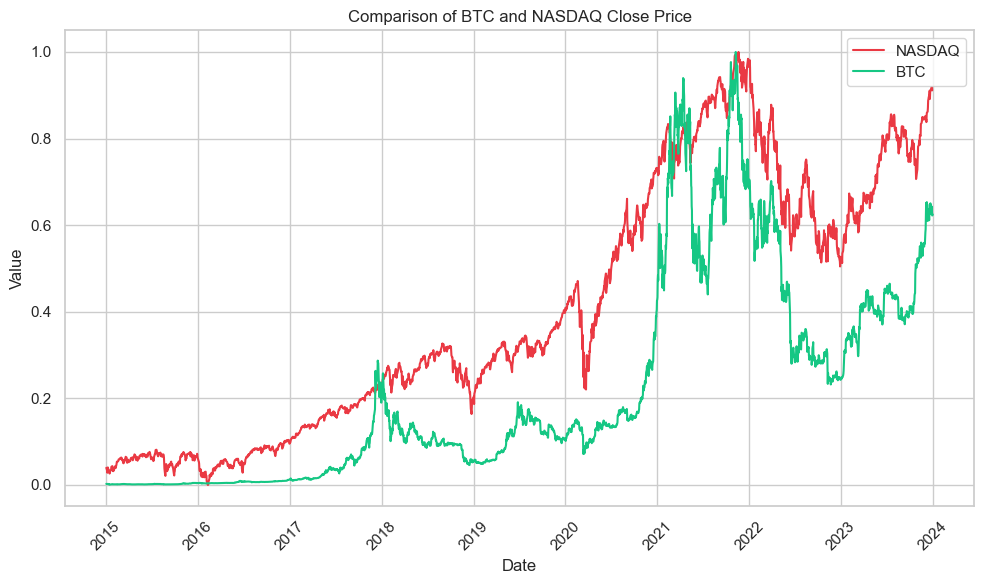

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of BTC and NASDAQ Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
  - 비슷한 부분
    - 2015년 ~ 2024년까지 나스닥과 비트코인의 가격이 모두 우상향한다는 점이 같다.
    - 비슷한 시기(2017년, 2021년)에 상승하고 비슷한 시기(2020년, 2022년)에 하락하는 모습을 보여준다.
  - 다른 부분
    - 2018년에 주식시장을 주목할만한 변동성으 보여주지 않았지만, 비트코인은 급등했다.
    - 2020년 말에서 2021년 말까지 나스닥은 꾸준한 상승을 보여줬지만 비트코인은 급등하고 2021년 중반 급락 후 다시 급등하는 큰 변동성을 보여주었다.

### ❓ 비트코인은 왜 2017년에 급등했을까?
1. CME 및 CBOE의 비트코인 선물 출시
>- 2017년 시카고상품거래소(CME)와 시카고옵션거래소(CBOE)에서 비트코인 선물 게약을 출시하면서 제도권 금융 시장에 비트코인이 진입했다. 이로인해 많은 기관과 투자자들이 비트코인에 접근할 수 있게 되었다.

2. 미디어 관심과 대중화
>- CME 및 CBOE의 비트코인 선물 출시됨에 따라 대중화 되었고 대중의 관심 또한 집중되게 되었다. 이는 가격상승으로 이어졌다.

3. 수량 제한으로 인한 가격 급등 초래
>- 비트코인은 최대 수량을 2100만개로 제한했는데 이 때문에 수요가 증가할 경우 가격이 급등할 수 있는 구조이다. 실제로 많은 관심을 받고 수요가 증가하자 가격이 급등하데 되었다.
<br><br>
<div style='width:100%; display:flex;'>
    <img src='./images/news5.png' style='width:50%'>
    <img src='./images/news6.png'  style='width:50%'>  
</div>
<br><br>

**2018년도 비트코인의 급등 현상은 접근성에 대한 편의성 증가 이슈로 인한 급등이므로 금리, 물가와 관련없다고 판단했다. 2018년도 데이터는 제외하고 분석하기로 했다.**

### 2. NASDAQ, 비트코인, 물가 데이터 시각화
- 물가가 NASDAQ, 비트코인에 미치는 영향력을 분석해보자

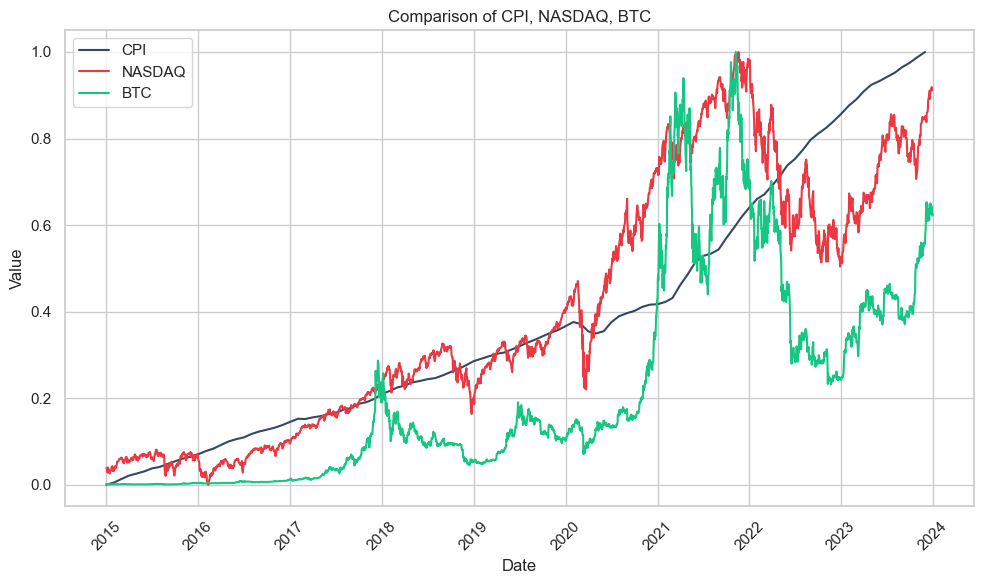

In [17]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=cpi_df['Date'], y=cpi_df['Cpi'], label='CPI', color='#34495e') 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of CPI, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 나스닥과 비트코인은 물가에 비해 변동성이 큰 모습을 보여주지만 모두 우상향하는 모습을 보여주었다.

#### ❗주목해야할 점
- 물가가 조정을 받은 2020년 초반기에 나스닥과 비트코인은 폭락했다.
- 폭락 후 전고점을 넘어서는 큰 반등이 있었으며, 이 시기에 물가의 상승세가 가파러지고 나스닥과 비트코인 모두 급등하였다.
- 물가는 꾸준히 상승하지만 비트코인과 나스닥은 2022년 큰 조정을 받는다.

### 3. NASDAQ, 비트코인, 금리 데이터 시각화
- 금리가 NASDAQ과 비트코인에 미치는 영향력을 분석해보자

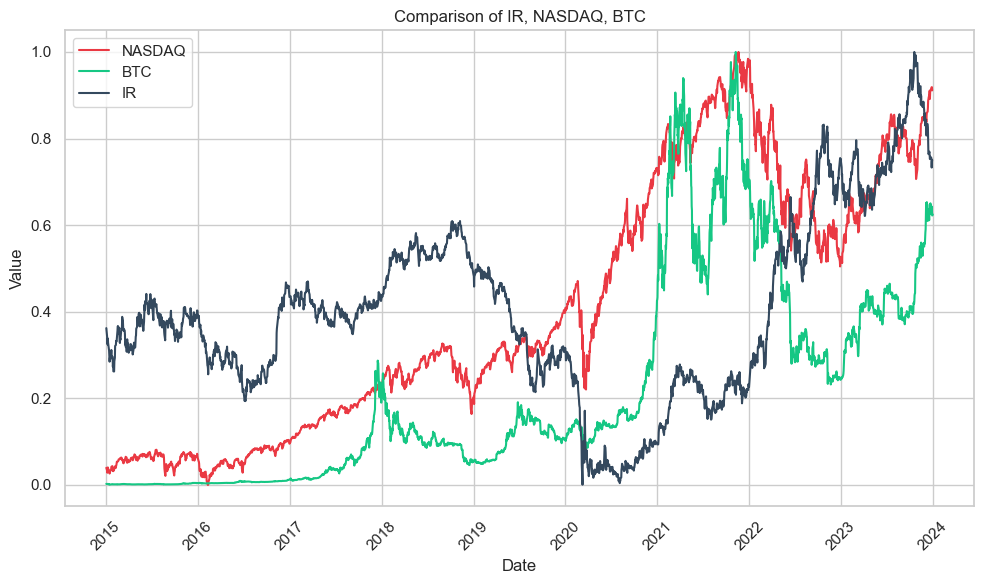

In [18]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
sns.lineplot(x=ir_df['Date'], y=ir_df['Close'], label='IR', color='#34495e') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of IR, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 나스닥과 비트코인은 우상향했지만 금리는 2018년 말부터 2020년 초까지 계속 하락했다.

#### ❗ 주목해야할 점
- 금리가 최저점을 도달한 시점인 2020년도에 나스닥과 비트코인 모두 급락했다.
- 금리가 최저점에 도달한 이후 2024년 까지 꾸준히 상승했고 비트코인과 나스닥 모두 상승했다.
- 2022년도에는 금리와 비트코인이 디커플링 되는 현상이 나타났다. 하지만 이후 함께 상승했다.
- 2020년을 제외하면 금리와 나스닥, 비트코인이 반대로 움직이는 현상이 자주 보인다.

**금리과 나스닥, 비트코인이 디커플링 되는 이유를 투자자들의 투자 심리를 참고하여 분석해보자**

### 3. VIX지수를 기준으로 한 데이터 시각화
- 가상자산의 투자심리와 나스닥의 투자 심리 데이터를 별도로 구할수 없어 투자시장의 투자심리리 데이터를 사용했다.
- 실제 가상자산의 투자심리와 나스닥의 투자심리와 다를수 있다는 부분을 감안해야한다.
- 투자심리를 나타내는 지수인 VIX지수를 시각화한다.

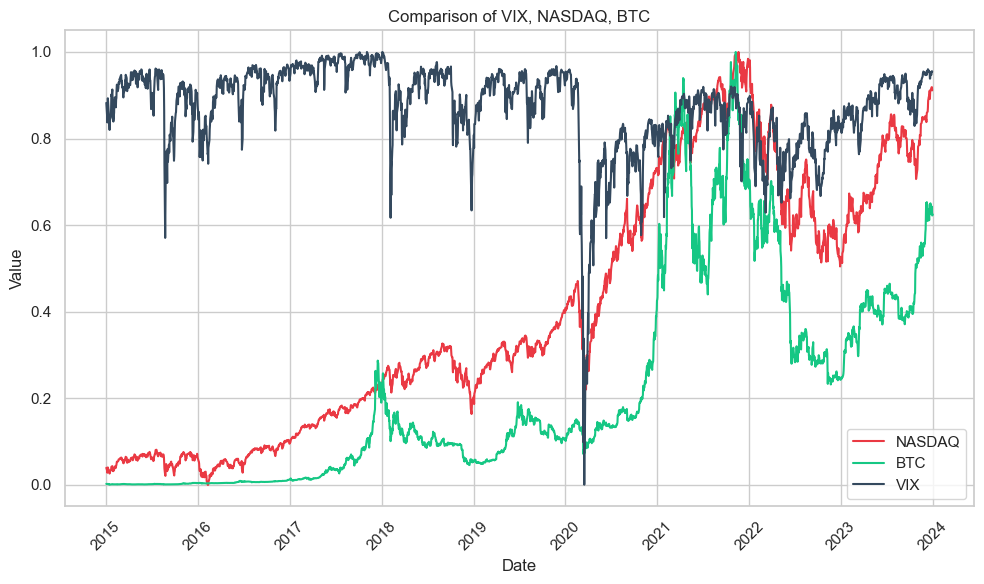

In [19]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1) 
sns.lineplot(x=nasdaq_df['Date'], y=nasdaq_df['Close'], label='NASDAQ', color='#ea3943')  
sns.lineplot(x=btc_df['Date'], y=btc_df['Close'], label='BTC', color='#16c784')  
sns.lineplot(x=vix_df['Date'], y=vix_df['Close'], label='VIX', color='#34495e') 
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of VIX, NASDAQ, BTC')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 나스닥과 비트코인이 급락한 2020년에 투자심리 또한 굉장히 위축되어 있는모습을 보여줬다.
- 투자 심리가 최저점을 찍은 이후 다시 회복되면서 나스닥과 비트코인도 전고점을 돌파했다.

**VIX 지수의 차트를 봐서는 특징을 찾기 어렵다. 구간을 나눠 다시 시각화 해보자**

In [20]:
l1, l2, l3, l4 = np.percentile(vix_df['Close'], [20, 40, 60, 80])
print(l1, l2, l3, l4)

0.8089191042639847 0.8716519468239515 0.9167641093582651 0.9495581246456056


In [21]:
def get_level(x):
    if x <= l1:
        return 'Extreme Fear'
    if x <= l2:
        return 'Fear'
    if x <= l3:
        return 'Neutral'
    if x <= l4:
        return 'Greed'
    return 'Extreme Greed'

In [22]:
vix_df['Level'] = vix_df['Close'].apply(get_level)
vix_df

,Date,Open,High,Low,Close,Volume,Level
0,2015-01-02,0.118757,0.142201,0.137356,0.882393,0.0,Neutral
1,2015-01-05,0.138165,0.157300,0.171979,0.853433,0.0,Fear
2,2015-01-06,0.153637,0.178440,0.177318,0.837118,0.0,Fear
3,2015-01-07,0.151194,0.149816,0.169552,0.861727,0.0,Fear
4,2015-01-08,0.121064,0.115284,0.136386,0.892998,0.0,Neutral
...,...,...,...,...,...,...,...
2259,2023-12-22,0.063925,0.061056,0.071833,0.947111,0.0,Greed
2260,2023-12-26,0.064604,0.058955,0.071186,0.947655,0.0,Greed
2261,2023-12-27,0.054425,0.048976,0.061641,0.955269,0.0,Extreme Greed
2262,2023-12-28,0.046553,0.043855,0.061802,0.954725,0.0,Extreme Greed


### 4. VIX지수를 5등급으로 데이터 시각화
- 투자심리를 나타내는 지수인 VIX지수를 5단계로 나누어 세분화 한뒤 각 년도마다 단계별 비율을 시각화한다.

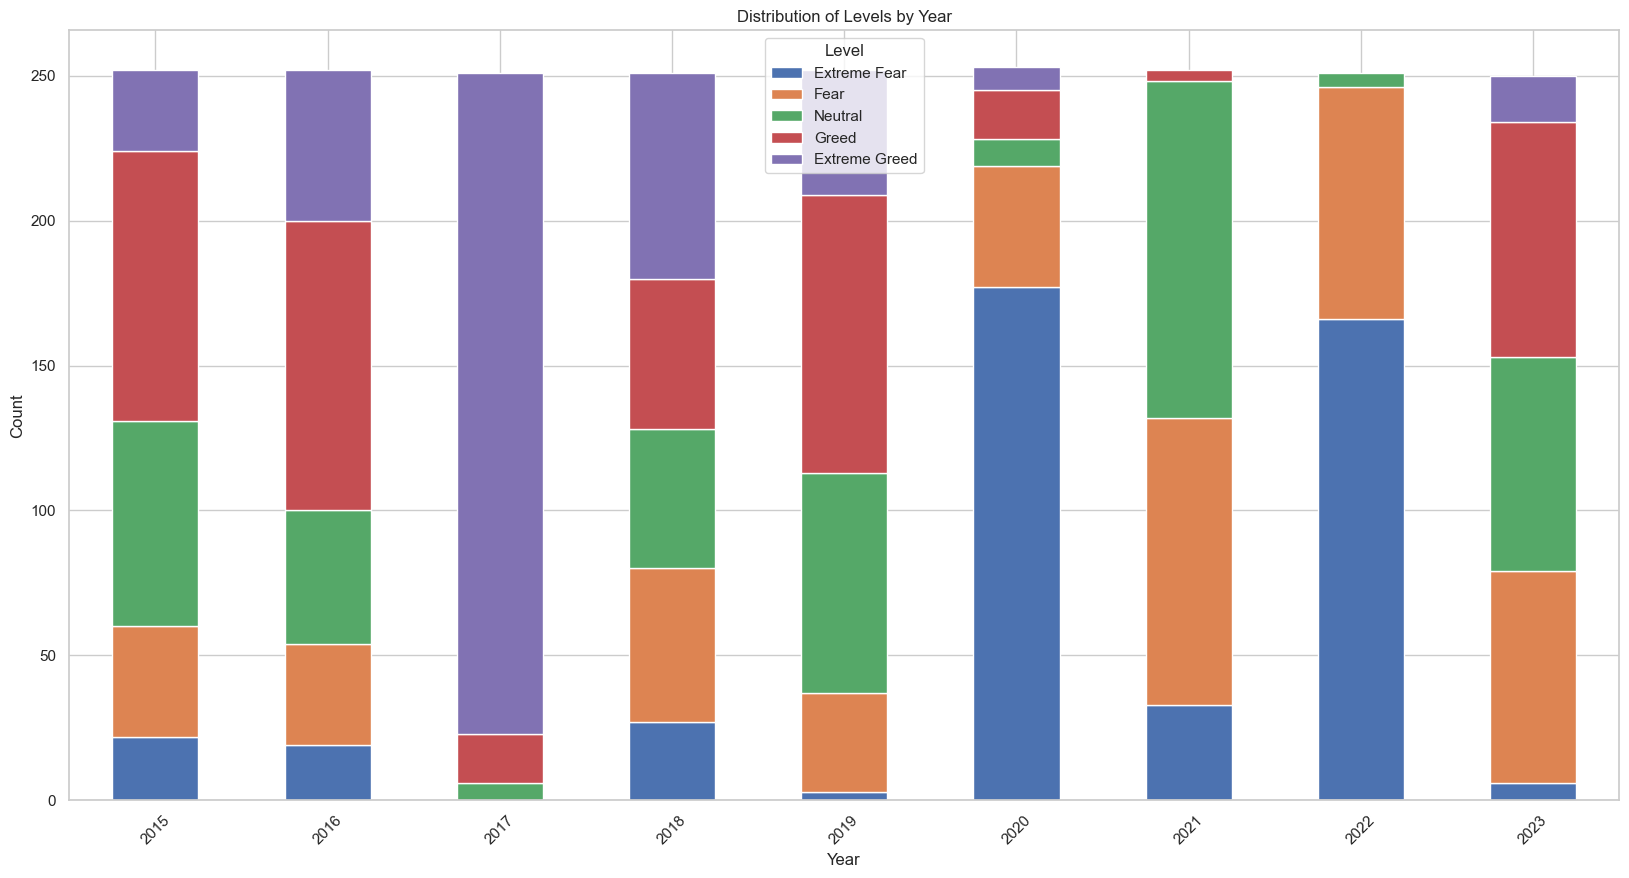

In [23]:
vix_df['Year'] = vix_df['Date'].dt.year

level_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
vix_df['Level'] = pd.Categorical(vix_df['Level'], categories=level_order, ordered=True)
yearly_level_counts = vix_df.groupby(['Year', 'Level']).size().unstack(fill_value=0)
yearly_level_counts = yearly_level_counts[level_order]

yearly_level_counts.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Distribution of Levels by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Level')
plt.show()

#### 📌 분석 결과
- 2019년 금리는 인하 되지만 비트코인과 나스닥은 상승했다. 이 때 투자 심리는 Extreme Fear등급 비중이 2020년도에 비해 상대적으로 낮음으로 긍정적이었다고 볼 수 있다.
- 2022년 금리는 인상 되었지만 비트코인과 나스닥은 하락했다. 이 때 투자 심리는 Extreme Fear등급이 다른 년도에 비해 상대적으로 높음으로 부정적이었다고 볼 수 있다.

### ✨ 중간 요약
- 금리, 물가가 하락한 2020년에 자산 시장중 하나인 나스닥과 비트코인이 하락했다.
- 금리는 물가와 다르게 나스닥과 비트코인과 디커플링 되는 모습을 종종 보여주었다.
- 투자 심리를 분석해 본 결과 금리가 하락하면 투자심리가 긍정적이었으며 금리가 하락하면 부자 심리가 부정적이었다.
- 2018년 비트코인은 금리, 물가와 관련없이 단독으로 급등하는 모습을 보여주었다.
- 물가, 금리가 반등함에 따라 비트코인과 나스닥도 함께 반등하는 모습을 보여주었다.

**단순히 비트코인과 나스닥의 가격이 올랐다 보다는 자금의 흐름을 보며 좀 더 자세히 금리, 물가와 비트코인과 나스닥의 상관관계를 분석해보자**

### 5. 비트코인과 나스닥의 자금 유입

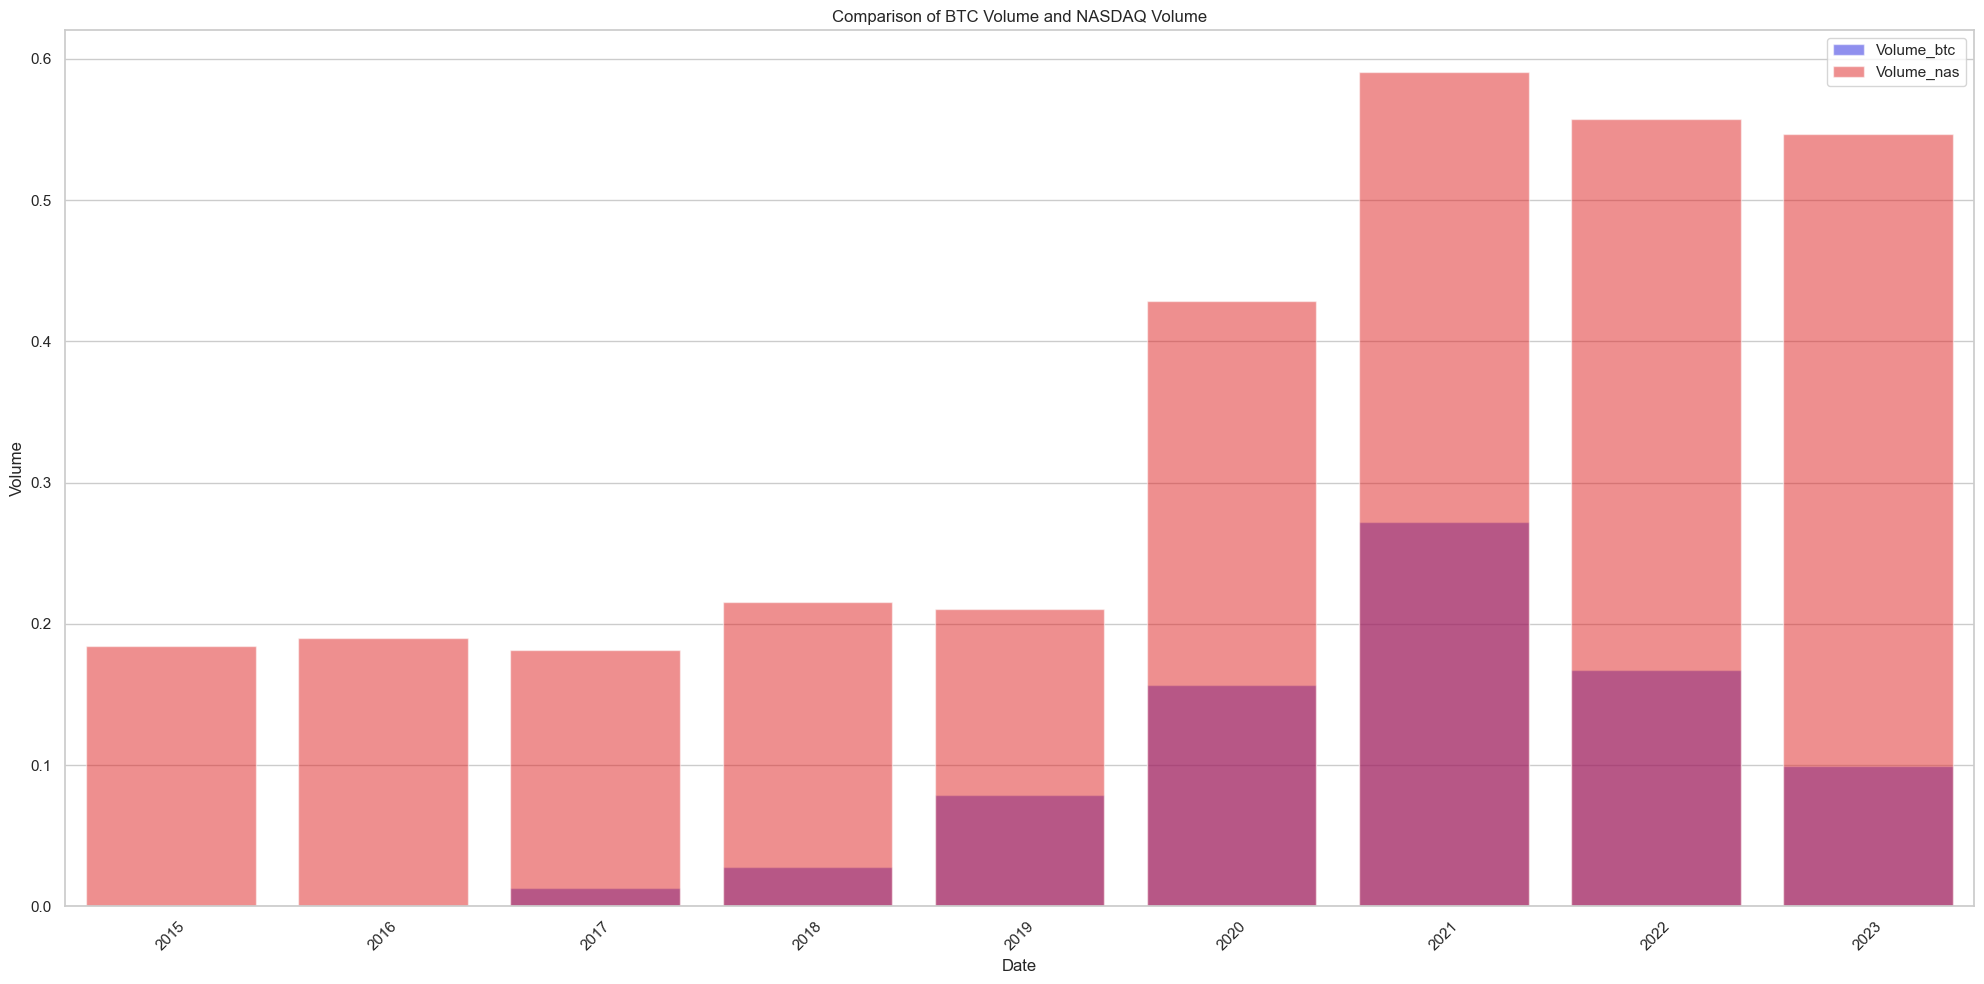

In [24]:
btc_month_df = btc_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
nas_month_df = nasdaq_df.groupby(pd.Grouper(key='Date', freq='MS')).max().reset_index()
merge_month_df = pd.merge(btc_month_df, nas_month_df, on='Date', suffixes=('_btc', '_nas'))
merge_month_df['Year'] = merge_month_df['Date'].dt.year
yearly_avg_df = merge_month_df.groupby('Year').mean().reset_index()

plt.figure(figsize=(20, 10))

sns.barplot(data=yearly_avg_df, x='Year', y='Volume_btc', color='blue', alpha=0.5, label='Volume_btc')
sns.barplot(data=yearly_avg_df, x='Year', y='Volume_nas', color='red', alpha=0.5, label='Volume_nas')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Comparison of BTC Volume and NASDAQ Volume')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 분석결과
- 물가, 금리가 폭락했을때 많은 사람들이 자산에 관심을 갖게 되었고 이는 투자 심리의 회복으로 이어졌다고 예측할 수 있다.
- 투자 심리가 회복됨에 따라 자산 시장중 하나인 나스닥과 비트코에 영향을 미쳤다고 예측할 수 있다.
- 하지만 비트코인의 경우 비중이 큰것은 사실이지만 코인중 하나이므로 전체 가상자산의 자금유입을 한번 확인해볼 필요가 있다고 판단했다.

### 6. 비트코인 도미넌스 데이터를 활용해 가상자산에서 각 코인들의 비중 변화 데이터 시각화
- 비중 변화는 2019년과 2020년이 크게 다르지 않았다.

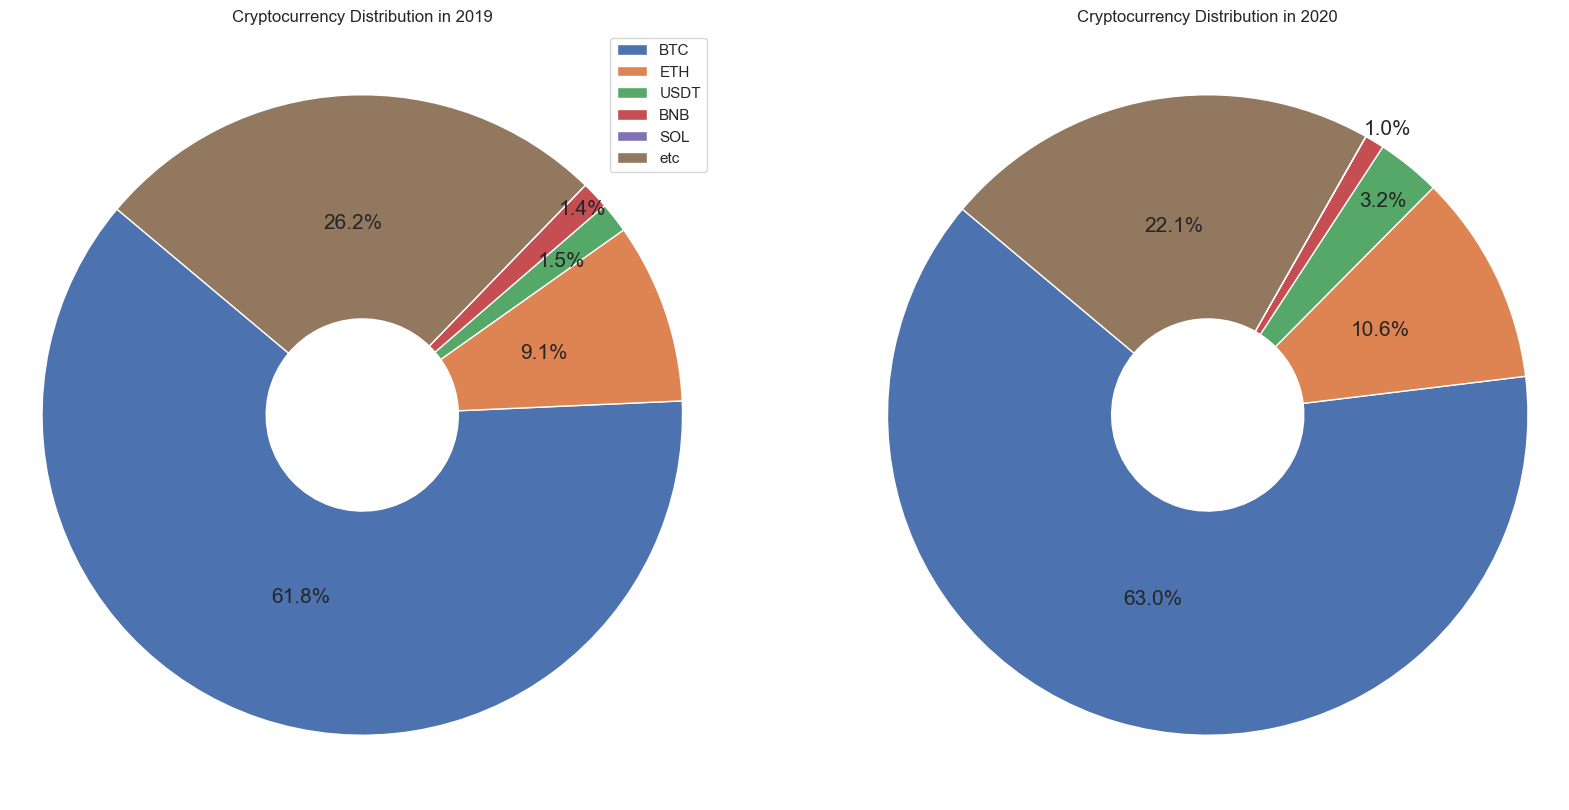

In [25]:

dominance_df_2019 = dominance_df[dominance_df['Date'].dt.year == 2019]
dominance_df_2020 = dominance_df[dominance_df['Date'].dt.year == 2020]


dominance_df_2019 = dominance_df_2019.mean().reset_index()
dominance_df_2019.columns = ['name', 'value']
dominance_df_2019 = dominance_df_2019.drop(0).reset_index()
dominance_df_2019 = dominance_df_2019.drop(columns='index', axis=1)

dominance_df_2020 = dominance_df_2020.mean().reset_index()
dominance_df_2020.columns = ['name', 'value']
dominance_df_2020 = dominance_df_2020.drop(0).reset_index()
dominance_df_2020 = dominance_df_2020.drop(columns='index', axis=1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) 
labels = dominance_df_2019['name']
sizes = dominance_df_2019['value']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
plt.rcParams['font.size'] = 15
_, _, autotexts_2019 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2019[i].get_position() 
    if i == 2:
        autotexts_2019[i].set_position((x+0.15, y+0.11))
    if i == 3:
        autotexts_2019[i].set_position((x+0.25, y+0.23))
    if i == 4:
        autotexts_2019[i].set_visible(False)
plt.title('Cryptocurrency Distribution in 2019')
plt.legend(dominance_df_2019['name'])
plt.axis('equal')

plt.subplot(1, 2, 2)  
labels = dominance_df_2020['name']
sizes = dominance_df_2020['value']
plt.rcParams['font.size'] = 15
_, _, autotexts_2020 = plt.pie(sizes, autopct='%1.1f%%', startangle=140, wedgeprops=wedgeprops)
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts_2020[i].get_position() 
    if i == 2:
        autotexts_2020[i].set_position((x+0.17, y+0.2))
    if i == 3:
        autotexts_2020[i].set_position((x+0.25, y+0.38))
    if i == 4:
        autotexts_2020[i].set_visible(False)
plt.title('Cryptocurrency Distribution in 2020')
plt.axis('equal')
plt.show()

##### 비트코인 도미넌스란? : 전체 코인시장에서 비트코인 대비 다른 코인들의 비중을 알아볼수 있는 데이터이다.

#### 📌 분석 결과
- 비트코인의 비중이 더 1.2% 더 증가했지만, 크게 증가하지 않은 점을 고려했을때 전체 자상자산에 고르게 자금이 유입되었다고 예측해 볼수 있다.
- 2020년 코인이 급등했음에도 불구하고 비트코인의 비중이 건재함으로 보아 계속 비트코인의 데이터를 사용해도 괜찮겠다고 판단했다.

### ❓ 비트코인과 나스닥이 급락, 급등한 2020년에는 무슨일이 있었을까
#### 2020년 코로나 팬데믹 
- 전 세계 거의 모든 국가와 지역에서 확진자가 발생하며, 감염자 수는 기하급수적으로 늘어난다.
- 이로인해 거리두기, 봉새 조치가 시행 되었다.
- 학교, 회사, 공공 시설의 휴업과 모임 취소등이 이루어 졌다.
- 이로인해 많은 산업과 사업이 중단되고, 실업률이 상승했으며 금융시장에는 대폭적이 변동이 있었다.

<div style='width:100%; display:flex;'>
    <img src='./images/news1.png' style='width:50%'>
    <img src='./images/news2.png'  style='width:50%'>  
</div>

In [26]:
region_data_df = covid_df.groupby('Continent').agg({
    'Population': 'sum',
    'TotalCases': 'sum',
    'TotalDeaths': 'sum'
}).reset_index()
region_data_df['CasesRatio'] = (region_data_df['TotalCases'] / region_data_df['Population'])
region_data_df['DeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['Population'])
region_data_df['CasesDeathsRatio'] = (region_data_df['TotalDeaths'] / region_data_df['TotalCases'])

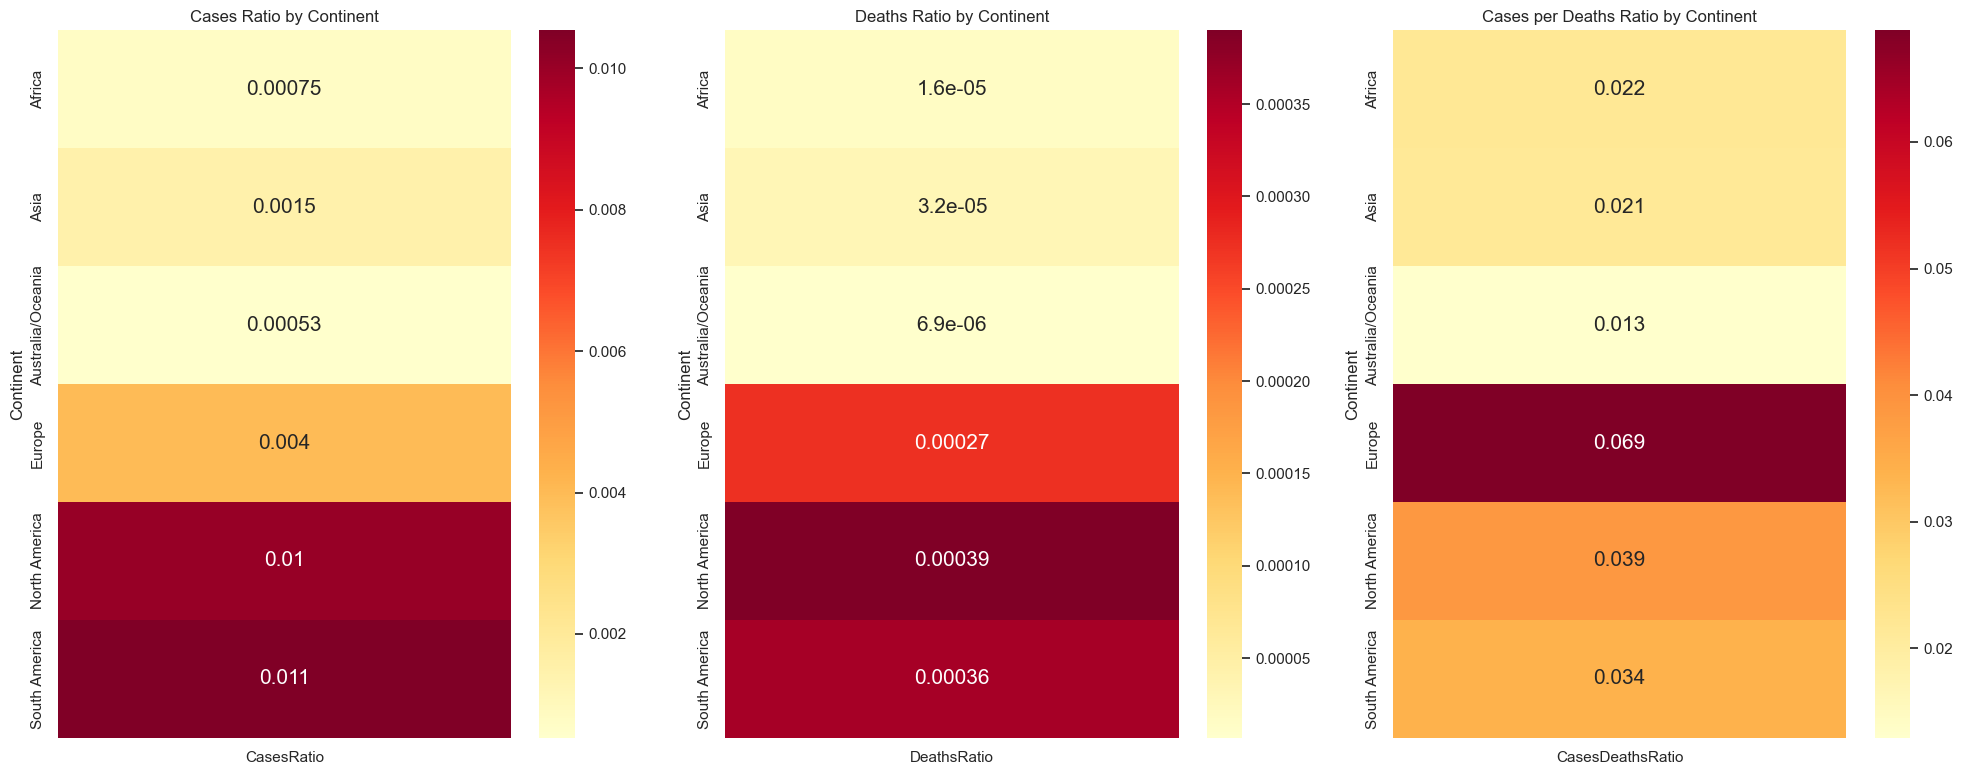

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

pivot_cases_ratio = region_data_df.pivot_table(index='Continent', values='CasesRatio', aggfunc='mean')
sns.heatmap(pivot_cases_ratio, annot=True, cmap='YlOrRd', ax=axes[0])
axes[0].set_title('Cases Ratio by Continent')

pivot_deaths_ratio = region_data_df.pivot_table(index='Continent', values='DeathsRatio', aggfunc='mean')
sns.heatmap(pivot_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Deaths Ratio by Continent')

pivot_cases_deaths_ratio = region_data_df.pivot_table(index='Continent', values='CasesDeathsRatio', aggfunc='mean')
sns.heatmap(pivot_cases_deaths_ratio, annot=True, cmap='YlOrRd', ax=axes[2])
axes[2].set_title('Cases per Deaths Ratio by Continent')

plt.tight_layout()
plt.show()

#### 📌 분석 결과
- 모든 대륙에서 확진자와 확진 후 사망자까지 존재함으로 전세계적으로 코로나가 유행했음을 알수 있다.
- 아메리카, 유럽 대륙이 큰 타격을 입었을 것으로 예측된다.

#### 주목해야할 점
- 선진국들이 타격을 크게 입었으므로 경제가 좋지 않았음을 예측 할수 있다.

### ❓그렇다면 코로나가 금리, 물가를 움직이게 만든 요인은 무엇일까

1. 금리에 대한 영향
>- 경제활동이 둔화되고 실업률이 급증하면서 중앙은행들은 금리를 낮추어 기업과 가계가 저렴한 금리로 대출을 받을 수 있도록 함으로써 경제를 부양하려고 했다.
>- 경제 안정화를 하기 위해 많은 은행들이 대규모 자산 매입 프로그램을 통해 자산 시장에 유동성을 공급하였다.

2. 물가에 대한 영향
>- 많은 나라들이 봉쇄 관련 조치를 시행하면서 소비자 수요가 급격히 줄어들었다.
>- 글로벌 공급망이 문제가 생기면서 일부 상품과 서비스의 공급이 감고하였다. 이로인해 특정 품목의 가격이 상승하는 원인이 되었다.
>- 많은 나라들이 대규모 재난지원 정책을 펼쳤고 이로 인해 인플레이션이 발생하게 되었다.


3. 코로나 팬데믹 이후 경제 회복
>- 인플레이션을 잡기 위해 낮추었던 금리를 큰폭으로 인상하기 시작했다.

### 📝 데이터 분석 결과 보고서
 
### ✔ 요약

#### 1️⃣ 코로나 펜데믹으로 인한 경제적 타격
- 2020년 코로나 팬데믹으로 인해 실업률이 증가하고 산업과 사업이 중단되는 등 경제가 빠르게 악화되기 시작한다.
- 이로 인해 많은 기업들이 실적이 악화 되었으며 주가가 하락하고 주식과 코인보다 안전한 현금으로 관심이 쏠리며 자산의 가격이 하락하게 된다.

#### 2️⃣ 경제 안정화 시도
- 많은 국가들이 경제를 살리기 위해 저금리 정책을 실행해 대출을 활성화 하였다. 이때 금리가 0%에 수렴하게 된다.
- 재난지원 정책에 대규모 자금이 투입되었으며, 시중에 많은 화폐가 풀리게 된다.
- 이로 인해 화폐의 가치가 하락하게 되고 대중들은 자신이 보유한 화폐 가치의 하락을 막기 위해 자산에 투자하기 시작한다.

#### 3️⃣ 물가, 금리 변동
- 코로나 팬데믹으로 인해 경제가 악화 되었을 때 저금리로 대출을 유도했다. 이 과정에서 금리가 대폭 인하된다.
- 경제 안정화를 시도하며 시중에 많은 화폐를 투입한다. 이 과정에서 화폐가치 하락으로 인한 물가가 상승한다.
- 시중에 너무 많은 화폐를 투입하게 되자 인플레이션이 발생한다. 각 국가들은 시중에 투입한 화폐를 다시 거둬들이고, 인플레이션을 막기위해 금리를 대폭 상승시킨다.

#### 4️⃣ 비트코인과 나스닥의 변화
- 2018년 비트코인이 단독으로 급등하는 현상이 발생한다. 하지만 금리와 물가는 전혀 상관없는 접근성 이슈로 인해 발생한 현상이 었다.
- 2019년부터 코로나 팬데믹으로 경제가 악화되자 금리가 하락한다. 저금리로 저축의 이자가 낮아지자 자산중 하나인 비트코인과 나스닥의 가격이 상승한다. 하지만 많은 자금이 유입되지 않았다.
- 2020년 경제 안정화 시도로 금리가 폭락하고 물가가 폭락한다. 이 때 투자 심리가 최저점을 갱신함과 동시에 비트코인과 나스닥 또한 폭락한다. 투자 심리를 근거로 금리와 물가로 인한 영향 보다는 경제 침체 우려로 인한 현금화(투자심리 위축)로 예측된다.
- 너무 많은 재난 지원금 투입으로 화폐가치가 낮아지고 저금리로 인해 저축으로 물가 상승을 따라갈 수 없자 자산 투자가 많은 관심을 받는다. 이 관심은 비트코인과 나스닥의 거래량을 보아 실제로 투자로 이어졌다고 예측할 수 있다. 나스닥과 비트코인의 상승을 견인했다고 예측할 수 있다.
- 각 국가들은 높아진 물가를 바로 잡기위해 금리를 계속해서 인상한다. 2022년에 2020년과 2021년보다 비트코인과 나스닥 모두 거래량이 점차 감소하고 있었던 점으로 보아 고금리로 인해 저축이 다시 인기를 얻게 되고 높아진 가격으로 인해 수익창출이 발생하면서 조정을 받은 것으로 예측할 수 있다.

### 🔴 결론
- 금리는 주식 시장과 가상자산 시장에 중요한 영향을 미친다. 저금리 환경에서는 저축의 이자가 낮아져 자산 투자에 대한 관심이 증가하고, 이는 주식과 가상자산의 가격 상승으로 이어진다. 반면, 금리가 인상되면 저축이 매력적으로 되어 자산 시장에서 자금이 빠져나가면서 가격이 하락할 가능성이 높다.
- 2020년 코로나 팬데믹 이후 금리가 최저점을 찍었을 때 나스닥과 비트코인은 모두 급락 했으나, 이후 금리가 상승하면서 두 시장도 함께 상승하였다. 그러나 고금리 환경에서는 자산 시장이 조정을 받는 경향이 있었다.
- 물가 상승은 인플레이션을 의미하며, 이는 투자자들이 현금의 가치를 보전하기 위해 자산으로 이동하게 만든다. 2020년 팬데믹 이후 경제 안정화 과정에서 시중에 많은 화폐가 풀리면서 인플레이션이 발생했고, 이는 나스닥과 비트코인 가격 상승으로 이어졌다.
- 그러나 인플레이션을 억제하기 위해 금리가 인상되면서 자상 시장의 조정이 나타났으며, 이는 주식과 비트코인의 가격 변동성으로 이어졌다.

**따라서 금리, 물가의 변동은 주식시장과 가상자산 시장의 가격 흐름에 중요한 역할을 하며, 이를 종합적으로 분석하는 것이 시장의 변동성을 이해하는데 필수적이다.**